# Predicting the Rainfall with Logistic Regression Classifier

In [66]:
# Importing libraries for data processing & visualization

import io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [67]:
# Ignoring warning messages to increase readability

import warnings

warnings.filterwarnings('ignore')

In [68]:
# Importing dataset

df = pd.read_csv('weatherAUS.csv')

# Dimension of the dataset

df.shape

(142193, 24)

In [69]:
# Display the first five instances of the dataset
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1007.1       8.0       NaN     16.9     21.8         No      0.0   
1       1007.8       NaN       NaN     17.2     24.3         No      0.0   
2       1008.7       NaN       2.0     21.0     23.2         No      0.0   
3       1012.8       NaN       NaN     18.1     26.5         No      1.0   
4       1006.0       7.0       8.0     17.8     29.7         No      0.2   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 24 columns]

In [70]:
# Feature names (Figure 1)

columns = df.columns
columns.to_frame(index=False)

0
0            Date
1        Location
2         MinTemp
3         MaxTemp
4        Rainfall
5     Evaporation
6        Sunshine
7     WindGustDir
8   WindGustSpeed
9      WindDir9am
10     WindDir3pm
11   WindSpeed9am
12   WindSpeed3pm
13    Humidity9am
14    Humidity3pm
15    Pressure9am
16    Pressure3pm
17       Cloud9am
18       Cloud3pm
19        Temp9am
20        Temp3pm
21      RainToday
22        RISK_MM
23   RainTomorrow

In [71]:
# Dropping 'RISK_MM' to prevent overfitting

df.drop(['RISK_MM'], axis=1, inplace=True)

## Explore categorical features

In [72]:
# Find out which features are categorical

categorical_features = [var for var in df.columns if df[var].dtype=='O']

In [73]:
# Display categorical features (Figure 2)

pd.DataFrame(data=categorical_features, columns=['Feature Names'])

Feature Names
0          Date
1      Location
2   WindGustDir
3    WindDir9am
4    WindDir3pm
5     RainToday
6  RainTomorrow

In [74]:
# Missing values in categorical features (Figure 3)

df[categorical_features].isnull().sum()

Date                0
Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

In [75]:
# Cardinality in categorical features (Figure 4)

for feature in categorical_features:
    print(feature, ' contains', len(df[feature].unique()), ' labels')

Date  contains 3436  labels
Location  contains 49  labels
WindGustDir  contains 17  labels
WindDir9am  contains 17  labels
WindDir3pm  contains 17  labels
RainToday  contains 3  labels
RainTomorrow  contains 2  labels


In [76]:
df.Location.value_counts()

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Ballarat            3028
Launceston          3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


In [189]:
df.WindGustDir.unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', nan, 'E', 'SSW'], dtype=object)

In [78]:
df.WindDir9am.value_counts()

N      11393
SE      9162
E       9024
SSE     8966
NW      8552
S       8493
W       8260
SW      8237
NNE     7948
NNW     7840
ENE     7735
ESE     7558
NE      7527
SSW     7448
WNW     7194
WSW     6843
Name: WindDir9am, dtype: int64

In [79]:
df.WindDir3pm.value_counts()

SE     10663
W       9911
S       9598
WSW     9329
SW      9182
SSE     9142
N       8667
WNW     8656
NW      8468
ESE     8382
E       8342
NE      8164
SSW     8010
NNW     7733
ENE     7724
NNE     6444
Name: WindDir3pm, dtype: int64

In [80]:
df.RainToday.value_counts()

No     109332
Yes     31455
Name: RainToday, dtype: int64

## Explore Numerical Features

In [81]:
# Find numerical features

numerical_features = [var for var in df.columns if df[var].dtype!='O']

In [82]:
# Display numerical features (Figure 5)

pd.DataFrame(data=numerical_features, columns=['Feature Names'])

Feature Names
0         MinTemp
1         MaxTemp
2        Rainfall
3     Evaporation
4        Sunshine
5   WindGustSpeed
6    WindSpeed9am
7    WindSpeed3pm
8     Humidity9am
9     Humidity3pm
10    Pressure9am
11    Pressure3pm
12       Cloud9am
13       Cloud3pm
14        Temp9am
15        Temp3pm

In [83]:
# Missing values in numerical features (Figure 6)

df[numerical_features].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
dtype: int64

In [84]:
# Find outliers in numerical features (Figure 7)
print(round(df[numerical_features].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  141556.0  141871.0  140787.0      81350.0   74377.0       132923.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      140845.0      139563.0     140419.0     138583.0     128179.0   
mean           14.0          19.0         69.0         51.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

Text(0, 0.5, 'WindSpeed3pm')

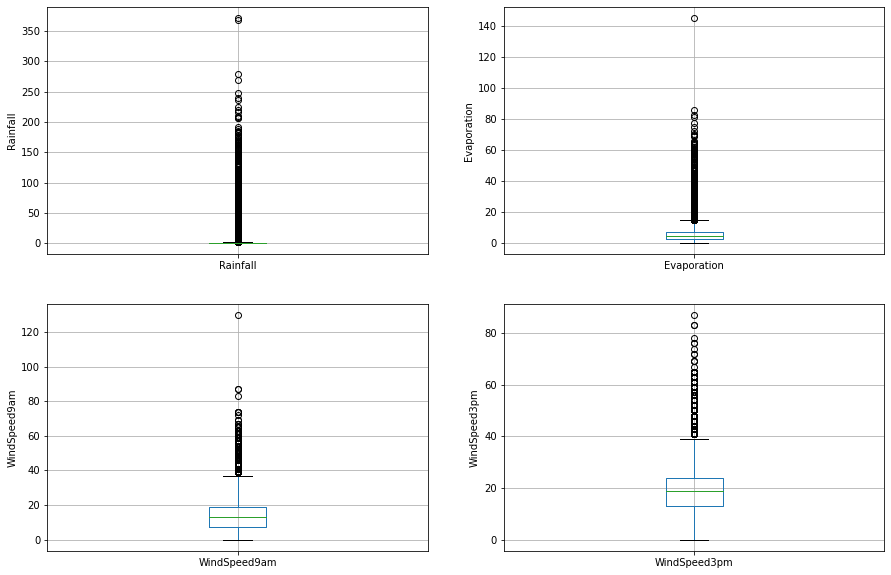

In [85]:
# Boxplots to visualize outliers (Figure 8)


plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
figure = df.boxplot(column='Rainfall')
figure.set_title('')
figure.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
figure = df.boxplot(column='Evaporation')
figure.set_title('')
figure.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
figure = df.boxplot(column='WindSpeed9am')
figure.set_title('')
figure.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
figure = df.boxplot(column='WindSpeed3pm')
figure.set_title('')
figure.set_ylabel('WindSpeed3pm')

Text(0, 0.5, 'RainTomorrow')

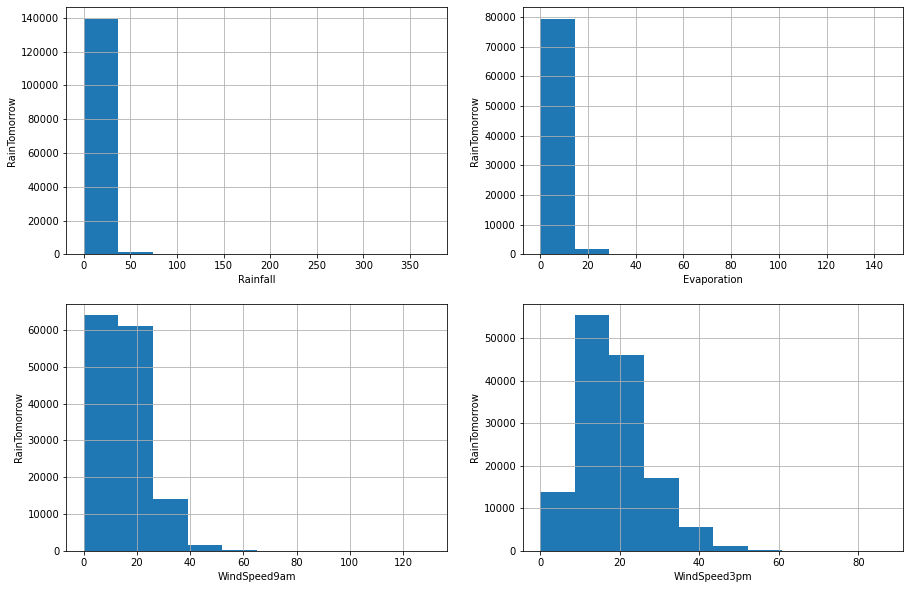

In [86]:
# Plotting histograms (Figure 9)

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
figure = df.Rainfall.hist(bins=10)
figure.set_xlabel('Rainfall')
figure.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
figure = df.Evaporation.hist(bins=10)
figure.set_xlabel('Evaporation')
figure.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
figure = df.WindSpeed9am.hist(bins=10)
figure.set_xlabel('WindSpeed9am')
figure.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
figure = df.WindSpeed3pm.hist(bins=10)
figure.set_xlabel('WindSpeed3pm')
figure.set_ylabel('RainTomorrow')

In [87]:
# Using IQR to find outliers

# for 'Rainfall'
IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

# for 'Evaporation'
IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

# for 'WindSpeed9am'
IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

# for 'WindSpeed3pm'
IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Rainfall outliers are values < -2.4000000000000004 or > 3.2
Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004
WindSpeed9am outliers are values < -29.0 or > 55.0
WindSpeed3pm outliers are values < -20.0 or > 57.0


## Data Pre-processing

In [88]:
# Create 3 columns out of 'Date' column

df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Drop the original 'Date' column

df.drop('Date', axis=1, inplace=True)

In [149]:
# Create feature vector and target variable

X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

In [150]:
# Train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [151]:
# Check the shape of X_train and X_test

X_train.shape, X_test.shape

((113754, 24), (28439, 24))

In [152]:
# Impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train, X_test]:
    for col in numerical_features:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)

In [153]:
# Check again missing values in numerical variables in X_train

X_train[numerical_features].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [154]:
# Check again missing values in numerical variables in X_test

X_test[numerical_features].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [155]:
# Check categorical features with missing data

categorical_features = [col for col in X_train.columns if X_train[col].dtypes == 'O']

for col in categorical_features:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

WindGustDir 0.06511419378659213
WindDir9am 0.07013379749283542
WindDir3pm 0.026443026179299188
RainToday 0.01001283471350458


In [156]:
# Impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [157]:
# Check missing values in categorical variables in X_train

X_train[categorical_features].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [158]:
# Check missing values in categorical variables in X_test

X_test[categorical_features].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [159]:
# Remove outliers in numerical features

def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

In [160]:
# for 'Rainfall'

X_train.Rainfall.max(), X_test.Rainfall.max()

(3.2, 3.2)

In [161]:
# for 'Evaporation'

X_train.Evaporation.max(), X_test.Evaporation.max()

(21.8, 21.8)

In [162]:
# for 'WindSpeed9am'

X_train.WindSpeed9am.max(), X_test.WindSpeed9am.max()

(55.0, 55.0)

In [163]:
# for 'WindSpeed3pm'

X_train.WindSpeed3pm.max(), X_test.WindSpeed3pm.max()

(57.0, 57.0)

In [164]:
X_train[numerical_features].describe()

MinTemp        MaxTemp       Rainfall    Evaporation  \
count  113754.000000  113754.000000  113754.000000  113754.000000   
mean       12.193497      23.237216       0.675080       5.151606   
std         6.388279       7.094149       1.183837       2.823707   
min        -8.200000      -4.800000       0.000000       0.000000   
25%         7.600000      18.000000       0.000000       4.000000   
50%        12.000000      22.600000       0.000000       4.800000   
75%        16.800000      28.200000       0.600000       5.400000   
max        33.900000      48.100000       3.200000      21.800000   

            Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  113754.000000  113754.000000  113754.000000  113754.000000   
mean        8.041154      39.884074      13.978155      18.614756   
std         2.769480      13.116959       8.806558       8.685862   
min         0.000000       6.000000       0.000000       0.000000   
25%         8.200000      31.000000       7.000000      13.000000   
50%         8.500000      39.000000      13.000000      19.000000   
75%         8.700000      46.000000      19.000000      24.000000   
max        14.500000     135.000000      55.000000      57.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  113754.000000  113754.000000  113754.000000  113754.000000   
mean       68.867486      51.509547    1017.640649    1015.241101   
std        18.935587      20.530723       6.738680       6.675168   
min         0.000000       0.000000     980.500000     977.100000   
25%        57.000000      37.000000    1013.500000    1011.000000   
50%        70.000000      52.000000    1017.600000    1015.200000   
75%        83.000000      65.000000    1021.800000    1019.400000   
max       100.000000     100.000000    1041.000000    1039.600000   

            Cloud9am       Cloud3pm        Temp9am        Temp3pm  
count  113754.000000  113754.000000  113754.000000  113754.000000  
mean        4.651801       4.703588      16.995062      21.688643  
std         2.292726       2.117847       6.463772       6.855649  
min         0.000000       0.000000      -7.200000      -5.400000  
25%         3.000000       4.000000      12.300000      16.700000  
50%         5.000000       5.000000      16.700000      21.100000  
75%         6.000000       6.000000      21.500000      26.300000  
max         9.000000       8.000000      40.200000      46.700000

In [165]:
X_train

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
110803   Witchcliffe     13.9     22.6       0.2          4.8       8.5   
87289         Cairns     22.4     29.4       2.0          6.0       6.3   
134949  AliceSprings      9.7     36.2       0.0         11.4      12.3   
85553         Cairns     20.5     30.1       0.0          8.8      11.1   
16110      Newcastle     16.8     29.2       0.0          4.8       8.5   
...              ...      ...      ...       ...          ...       ...   
41993     Wollongong      9.4     17.6       0.0          4.8       8.5   
97639   MountGambier      1.2     20.2       0.0          2.0      12.4   
95939       Adelaide     11.9     17.6       1.2          2.0       8.5   
117952         Perth      7.7     26.0       0.0         10.4      11.2   
43567     Wollongong     20.0     31.5       0.0          4.8       8.5   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Pressure9am  \
110803           S           41.0        SSE          S  ...       1013.9   
87289          ENE           33.0        SSE         SE  ...       1016.9   
134949           E           31.0         NE          N  ...       1018.1   
85553          ESE           37.0        SSE          E  ...       1014.1   
16110            W           39.0          N         SE  ...       1017.6   
...            ...            ...        ...        ...  ...          ...   
41993          SSW           35.0        ENE          E  ...       1022.2   
97639            N           33.0         NE         NW  ...       1022.0   
95939          WSW           39.0         SW        WSW  ...       1022.2   
117952         SSE           31.0         SE         SE  ...       1025.5   
43567          WNW           63.0        WNW        SSW  ...       1021.1   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  Year  \
110803       1013.4       5.0       5.0     18.8     20.4         No  2014   
87289        1013.1       7.0       5.0     26.4     27.5        Yes  2015   
134949       1013.6       1.0       1.0     28.5     35.0         No  2014   
85553        1010.8       2.0       3.0     27.3     29.4         No  2010   
16110        1015.2       5.0       8.0     22.2     27.0         No  2012   
...             ...       ...       ...      ...      ...        ...   ...   
41993        1019.9       6.0       8.0     16.3     16.2         No  2010   
97639        1017.9       0.0       1.0     11.2     19.7         No  2010   
95939        1022.8       5.0       5.0     14.5     17.1        Yes  2014   
117952       1023.0       0.0       0.0     14.4     24.6         No  2009   
43567        1020.7       5.0       5.0     26.1     22.8         No  2015   

        Month  Day  
110803      4   25  
87289      11    2  
134949     10   19  
85553      10   30  
16110      11    8  
...       ...  ...  
41993       9   19  
97639      10   25  
95939       9   11  
117952      3    3  
43567       4   16  

[113754 rows x 24 columns]

In [166]:
# Encode categorical features
# first encode RainToday

from sklearn.preprocessing import LabelEncoder

enc_dic = {}
for i in categorical_features:
    encoder = LabelEncoder()
    X_train[i] = encoder.fit_transform(X_train[i])
    X_test[i] = encoder.transform(X_test[i])
    enc_dic[i]=encoder

In [167]:
import pickle

fo = open("encoder_dic.pkl","wb")
pickle.dump(enc_dic, fo)

# Finalize X_train and X_test

X_train = pd.concat([X_train[numerical_features], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

X_test = pd.concat([X_test[numerical_features], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

In [168]:
# Scaling

X_train

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
110803        46     13.9     22.6       0.2          4.8       8.5   
87289          8     22.4     29.4       2.0          6.0       6.3   
134949         3      9.7     36.2       0.0         11.4      12.3   
85553          8     20.5     30.1       0.0          8.8      11.1   
16110         24     16.8     29.2       0.0          4.8       8.5   
...          ...      ...      ...       ...          ...       ...   
41993         47      9.4     17.6       0.0          4.8       8.5   
97639         22      1.2     20.2       0.0          2.0      12.4   
95939          0     11.9     17.6       1.2          2.0       8.5   
117952        31      7.7     26.0       0.0         10.4      11.2   
43567         47     20.0     31.5       0.0          4.8       8.5   

        WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure9am  \
110803            8           41.0          10           8  ...       1013.9   
87289             1           33.0          10           9  ...       1016.9   
134949            0           31.0           4           3  ...       1018.1   
85553             2           37.0          10           0  ...       1014.1   
16110            13           39.0           3           9  ...       1017.6   
...             ...            ...         ...         ...  ...          ...   
41993            11           35.0           1           0  ...       1022.2   
97639             3           33.0           4           7  ...       1022.0   
95939            15           39.0          12          15  ...       1022.2   
117952           10           31.0           9           9  ...       1025.5   
43567            14           63.0          14          11  ...       1021.1   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  Year  \
110803       1013.4       5.0       5.0     18.8     20.4          0  2014   
87289        1013.1       7.0       5.0     26.4     27.5          1  2015   
134949       1013.6       1.0       1.0     28.5     35.0          0  2014   
85553        1010.8       2.0       3.0     27.3     29.4          0  2010   
16110        1015.2       5.0       8.0     22.2     27.0          0  2012   
...             ...       ...       ...      ...      ...        ...   ...   
41993        1019.9       6.0       8.0     16.3     16.2          0  2010   
97639        1017.9       0.0       1.0     11.2     19.7          0  2010   
95939        1022.8       5.0       5.0     14.5     17.1          1  2014   
117952       1023.0       0.0       0.0     14.4     24.6          0  2009   
43567        1020.7       5.0       5.0     26.1     22.8          0  2015   

        Month  Day  
110803      4   25  
87289      11    2  
134949     10   19  
85553      10   30  
16110      11    8  
...       ...  ...  
41993       9   19  
97639      10   25  
95939       9   11  
117952      3    3  
43567       4   16  

[113754 rows x 24 columns]

In [169]:
# Dataset needs to be scaled before training a model

from sklearn.preprocessing import MinMaxScaler

cols = X_train.columns

scaler = MinMaxScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])



In [171]:
fo = open("scaler.pkl","wb")
pickle.dump(scaler, fo)

In [172]:
X_train.drop(["Year", "Month", "Day"], axis=1, inplace=True)
X_test.drop(["Year", "Month", "Day"], axis=1, inplace=True)

In [174]:
y_train

110803     No
87289      No
134949     No
85553      No
16110     Yes
         ... 
41993      No
97639      No
95939      No
117952     No
43567     Yes
Name: RainTomorrow, Length: 113754, dtype: object

#### X_train dataset is now pre-processed and ready to be used for training the Logistic Regression classifier.

## Training the model

In [175]:
# Train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# Instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# Fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

## Predict the results

In [176]:
y_pred_test = logreg.predict(X_test)
y_pred_test

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

# Saving the Model for Deployment

In [177]:
import pickle

fo = open("lr_rainfall_model.pkl","wb")
pickle.dump(logreg, fo)

In [178]:
fo.close()

In [179]:
fo = open("lr_rainfall_model.pkl","rb")
logreg = pickle.load( fo)

logreg.predict(X_test)

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [188]:
fo.close()

## Accuracy Score

In [181]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8456


In [182]:
# Comparison of training-set and test-set accuracy

y_pred_train = logreg.predict(X_train)
y_pred_train

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8425


In [183]:
# Print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8425
Test set score: 0.8456


In [184]:
# Model accuracy - null accuracy comparison

y_test.value_counts()

No     22067
Yes     6372
Name: RainTomorrow, dtype: int64

In [185]:
# Find null accuracy

null_accuracy = (22067/(22067+6372))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7759


## Confusion matrix

<AxesSubplot:>

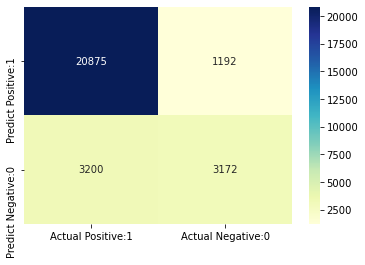

In [186]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Classification report

In [187]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.87      0.95      0.90     22067
         Yes       0.73      0.50      0.59      6372

    accuracy                           0.85     28439
   macro avg       0.80      0.72      0.75     28439
weighted avg       0.84      0.85      0.83     28439



In [89]:
# True Positive, True Negative, False Positive and False Negative

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [90]:
# Precision

precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9474


In [91]:
# Recall

recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8707


In [92]:
# True Positive Rate

true_positive_rate = TP / float(TP + FN)

print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8707


In [93]:
# False Positive Rate

false_positive_rate = FP / float(FP + TN)

print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.2620


In [94]:
# Specifity

specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.7380


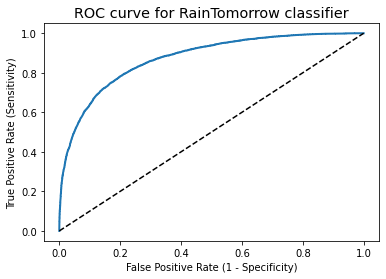

In [95]:
# ROC

from sklearn.metrics import roc_curve
y_pred = logreg.predict_proba(X_test)[:,1]
y_pred = y_pred.reshape(-1,1)
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 'Yes')
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [96]:
# Calculate ROC Area Under the Curve

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8729


In [97]:
# Calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8694


## k-Fold Cross Validation

In [98]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.84743528 0.84576502 0.84602875 0.84844622 0.84747253]


In [99]:
# Compute average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8470
